<a href="https://colab.research.google.com/github/elainejpai-14/Glaucoma-Detection-glaucoguard-major-project/blob/main/Trained%20CNN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

# Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1.Data collection & exploration

The datasets used in the project were discovered and collected using the information from an open source eye disease database.Three datasets (Drishti Rim-One and Acrima datasets) had fundus photographies which present glaucoma.


In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


#1.1  DRISTHI
>The dataset comprises of 101 retinal fundus images with 31 normal images and 70 glaucomatous images acquired using a retinal fundus camera. The ground truth for comparison of implemented approaches comprises of the ‘normal/abnormal’ labels and soft segmented maps of ‘disc/cup’ generated by the researchers of the IIIT Hyderabad in alliance with Aravind eye hospital in Madurai, India. Further, the images in the data repository are gathered from people of varying age groups visiting the hospital, with images acquired under varying brightness and contrast.
Link to dataset: (https://cvit.iiit.ac.in/projects/mip/drishti-gs/mip-dataset2/Home.php)

In [ ]:
dristhi_dir = '/content/drive/MyDrive/datasets/dristi'
train_glaucoma_dir = '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/GLAUCOMA'
train_normal_dir = '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/NORMAL'
test_glaucoma_dir = '/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/glaucoma'
test_normal_dir ='/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/normal'
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)
# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")

Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


<ipython-input-7-567d2ce37237>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


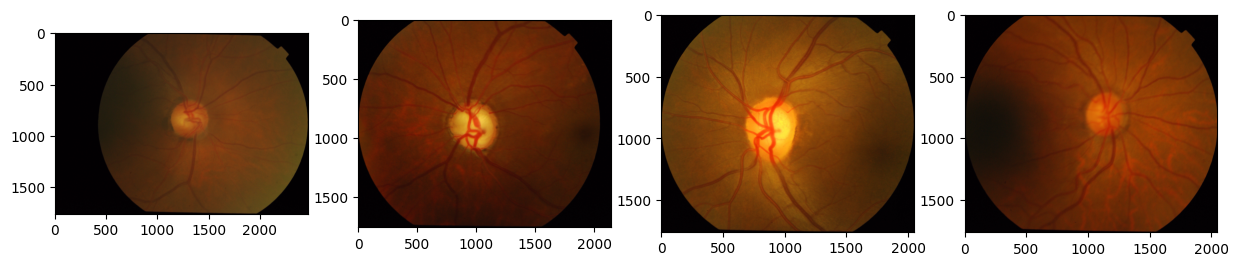


Sample Dristhi normal images:


<ipython-input-7-567d2ce37237>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


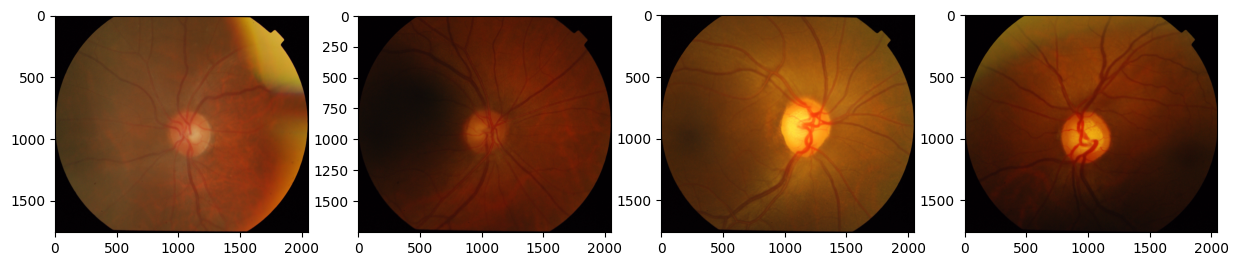

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()

# 1.2 Rim-One

>The RIM-ONE DL image dataset consists of 313 retinographies from normal subjects and 172 retinographies from patients with glaucoma. These images were captured in three Spanish hospitals: Hospital Universitario de Canarias (HUC), in Tenerife, Hospital Universitario Miguel Servet (HUMS), in Zaragoza, and Hospital Clínico Universitario San Carlos (HCSC), in Madrid.

>This dataset has been divided into training and test sets, with two variants:
* Partitioned randomly: the training and test sets are built randomly from all the images of the dataset.
* Partitioned by hospital: the images taken in the HUC are used for the training set, while the images taken in the HUMS and HCSC are used for testing.

In [ ]:
rimOne_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly'
train_glaucoma_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma'
train_normal_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/normal'
test_glaucoma_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma'
test_normal_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/normal'
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")

Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


<ipython-input-9-5215e82255ff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


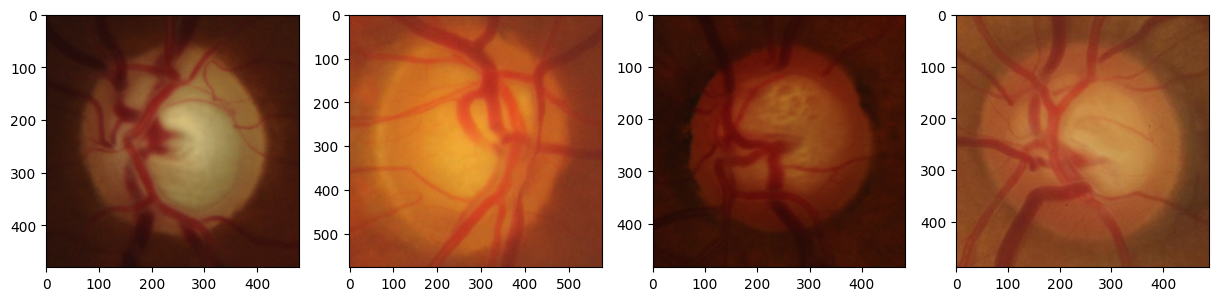


Sample Rim-One normal images:


<ipython-input-9-5215e82255ff>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


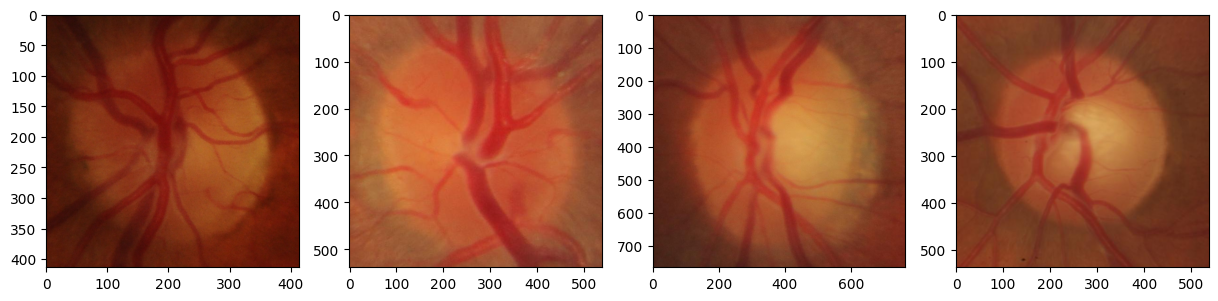

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

# 1.3. ACRIMA dataset
* Country: Spain
* No. of patients: unknown
* No. of images: 705
* Diseases present: Glaucoma and healthy eyes
* Instrument used: TRC retina camera (Topcon, Japan)
* Image format: JPEG

>ACRIMA database is composed by 705 fundus images (396 glaucomatous and 309 normal images). They were collected at the FISABIO Oftalmología Médica in Valencia, Spain, from glaucomatous and normal patients with their previous consent and in accordance with the ethical standards laid down in the 1964 Declaration of Helsinki. All images from ACRIMA database were annotated by glaucoma experts with several years of experience. They were cropped around the optic disc and renamed.



>The image name has the following structure: First, the name starts with the two letters "Im", followed by an image number composed by three digits (starting from 001 until 705), followed by the label (this label is "g" if the image is pathological and "_" if the image is normal). Finally, all image names have the database name, "ACRIMA", at the end of their names. For example, a name for a glaucomatous image is "Im686_g_ACRIMA" and "Im001_ACRIMA" for a normal image.

In [ ]:
acrima_dir = '/content/drive/MyDrive/datasets/ACRIMAA/database'
glaucoma_dir = '/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma'
normal_dir = '/content/drive/MyDrive/datasets/ACRIMAA/database/Normal'

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

# Look at the number of samples in each dataset
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


<ipython-input-11-ea888e79ac72>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


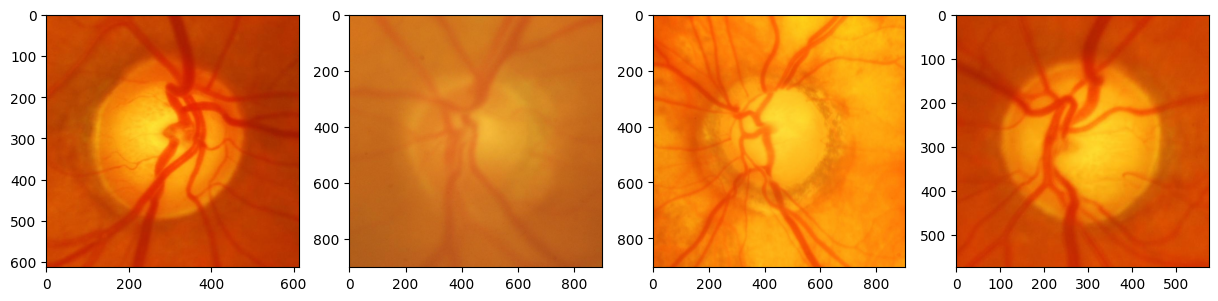


Sample normal images:


<ipython-input-11-ea888e79ac72>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


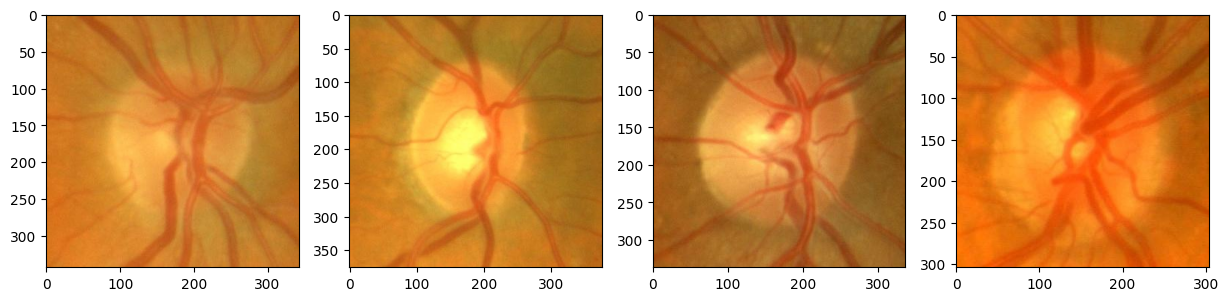

In [ ]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
plt.show()

print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
plt.show()

Combining datasets

In [ ]:
import os
import shutil

# Create destination directories
g_dest = '/content/drive/MyDrive/datasets/combine/glaucoma'
n_dest = '/content/drive/MyDrive/datasets/combine/normal'
os.makedirs(g_dest, exist_ok=True)
os.makedirs(n_dest, exist_ok=True)

# Define source paths for glaucoma
g_paths = ['/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma',
           '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/GLAUCOMA',
           '/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/glaucoma']

# Copy contents of each source directory to gl_dest
for path in g_paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            shutil.copy(os.path.join(root, file), g_dest)

# Define source paths for normal
n_paths = ['/content/drive/MyDrive/datasets/ACRIMAA/database/Normal',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/normal',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/normal',
           '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/NORMAL',
           '/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/normal']

# Copy contents of each source directory to n_dest
for path in n_paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            shutil.copy(os.path.join(root, file), n_dest)

# Print the number of files copied
print("Number of files copied for glaucoma:", len(os.listdir(g_dest)))
print("Number of files copied for normal:", len(os.listdir(n_dest)))

Number of files copied for glaucoma: 638
Number of files copied for normal: 653


# Combined

Total images: 1289
Total number of classes: 2
Total glaucoma images: 638
Total normal images: 653


<ipython-input-13-93579da7f5d7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_classes, y=data_count, palette=colors)


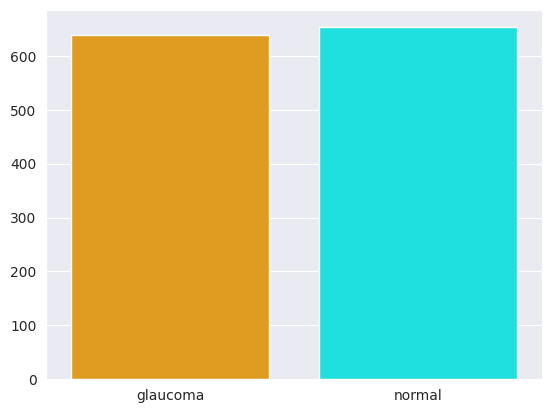

In [ ]:
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/datasets/combine'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/datasets/combine/glaucoma')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/datasets/combine/normal')]
data = [glaucoma, normal]
dataset_classes = ['glaucoma', 'normal']

image_count = len(list(base_dir.glob('*/*.jpg'))) + len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
    print(f'Total {x} images: {len(data[count])}')
    data_count.append(len(data[count]))
    count += 1

sns.set_style('darkgrid')

# Define custom colors for each class
colors = ['orange', 'cyan']

sns.barplot(x=dataset_classes, y=data_count, palette=colors)
plt.show()


In [ ]:
!pip install split-folders

Spliiting Ratio of Dataset 80:10:10 (Train:Test:Validation)



In [ ]:
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/datasets/combine'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.80,.10,.10), group_prefix=None)

Copying files: 1291 files [01:30, 14.22 files/s] 


Data augmentation done using Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


## CNN MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

# Initialize the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dropout(0.5)) # Adding dropout
classifier.add(Dense(units=256, activation='relu'))
classifier.add(BatchNormalization()) # Adding batch normalization
classifier.add(Dense(units=2, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model_info=classifier.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 150,
validation_data = val_ds,
validation_steps = int(round(128/32)),
callbacks=[early_stopping, reduce_lr])

Epoch 1/150
32/32 [==============================] - 122s 4s/step - loss: 0.3388 - accuracy: 0.8570 - val_loss: 0.3747 - val_accuracy: 0.8438
Epoch 2/150
32/32 [==============================] - 121s 4s/step - loss: 0.3684 - accuracy: 0.8330 - val_loss: 0.4293 - val_accuracy: 0.8125
Epoch 3/150
32/32 [==============================] - 129s 4s/step - loss: 0.3158 - accuracy: 0.8600 - val_loss: 0.6963 - val_accuracy: 0.7422
Epoch 4/150
32/32 [==============================] - 120s 4s/step - loss: 0.3777 - accuracy: 0.8280 - val_loss: 0.4642 - val_accuracy: 0.7969
Epoch 5/150
32/32 [==============================] - 126s 4s/step - loss: 0.3127 - accuracy: 0.8580 - val_loss: 0.4395 - val_accuracy: 0.8281
Epoch 6/150
32/32 [==============================] - 120s 4s/step - loss: 0.2991 - accuracy: 0.8610 - val_loss: 0.2916 - val_accuracy: 0.8750
Epoch 7/150
32/32 [==============================] - 124s 4s/step - loss: 0.3201 - accuracy: 0.8520 - val_loss: 0.3455 - val_accuracy: 0.8516
Epoch 

In [ ]:
classifier.save('/content/drive/MyDrive/datasets/combine_model/combine_cnn.h5')

#LEARNING CURVES

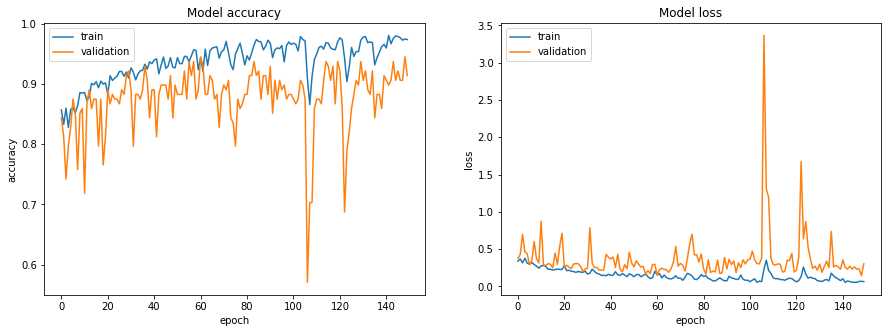

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)

Loading Model

In [ ]:
model=load_model('/content/drive/MyDrive/datasets/combine_model/combinee_cnn.h5')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


In [ ]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

In [ ]:
from keras.preprocessing.image import load_img

# Load the image from the specified path and resize it to the target size
test_image = load_img('/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma/Im321_g_ACRIMA.jpg', target_size=(256, 256))

# Now you can use the loaded image for prediction or any other tasks
prediction = glaucoma_prediction(test_image)
if prediction == 0:
    print("Glaucoma")
else:
    print("Non-Glaucoma")

1/1 [==============================] - 0s 376ms/step
Glaucoma


In [ ]:
from keras.preprocessing.image import load_img

# Load the image from the specified path and resize it to the target size
test_image = load_img('/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/normal/drishtiGS_007.png', target_size=(256, 256))

# Now you can use the loaded image for prediction or any other tasks
prediction = glaucoma_prediction(test_image)
if prediction == 0:
    print("Glaucoma")
else:
    print("Non-Glaucoma")

1/1 [==============================] - 0s 65ms/step
Non-Glaucoma


# Model Accuracy

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 8s 1s/step - loss: 0.0854 - accuracy: 0.9695
Loss: 0.08542841672897339 Accuracy: 0.9694656729698181


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

pred= np.round(model.predict(test_ds, verbose=1))
for i in range(len(pred)):
  print(i,pred[i])
print(len(pred))

5/5 [==============================] - 9s 2s/step
0 [1. 0.]
1 [1. 0.]
2 [1. 0.]
3 [1. 0.]
4 [1. 0.]
5 [1. 0.]
6 [1. 0.]
7 [1. 0.]
8 [1. 0.]
9 [1. 0.]
10 [1. 0.]
11 [1. 0.]
12 [1. 0.]
13 [1. 0.]
14 [1. 0.]
15 [1. 0.]
16 [1. 0.]
17 [1. 0.]
18 [1. 0.]
19 [1. 0.]
20 [1. 0.]
21 [1. 0.]
22 [1. 0.]
23 [1. 0.]
24 [1. 0.]
25 [1. 0.]
26 [1. 0.]
27 [1. 0.]
28 [1. 0.]
29 [1. 0.]
30 [1. 0.]
31 [1. 0.]
32 [1. 0.]
33 [1. 0.]
34 [1. 0.]
35 [1. 0.]
36 [1. 0.]
37 [1. 0.]
38 [1. 0.]
39 [1. 0.]
40 [1. 0.]
41 [1. 0.]
42 [1. 0.]
43 [1. 0.]
44 [1. 0.]
45 [1. 0.]
46 [1. 0.]
47 [1. 0.]
48 [1. 0.]
49 [1. 0.]
50 [1. 0.]
51 [1. 0.]
52 [1. 0.]
53 [0. 1.]
54 [1. 0.]
55 [1. 0.]
56 [1. 0.]
57 [1. 0.]
58 [1. 0.]
59 [1. 0.]
60 [1. 0.]
61 [1. 0.]
62 [1. 0.]
63 [1. 0.]
64 [0. 1.]
65 [0. 1.]
66 [0. 1.]
67 [1. 0.]
68 [0. 1.]
69 [0. 1.]
70 [0. 1.]
71 [0. 1.]
72 [0. 1.]
73 [0. 1.]
74 [0. 1.]
75 [0. 1.]
76 [0. 1.]
77 [0. 1.]
78 [0. 1.]
79 [0. 1.]
80 [0. 1.]
81 [0. 1.]
82 [0. 1.]
83 [0. 1.]
84 [0. 1.]
85 [0. 1.]
86 [0. 1.]
87 

Testing set confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

pred= np.round(model.predict(test_ds, verbose=1))

test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 7s 1s/step
[[63  2]
 [ 2 64]]


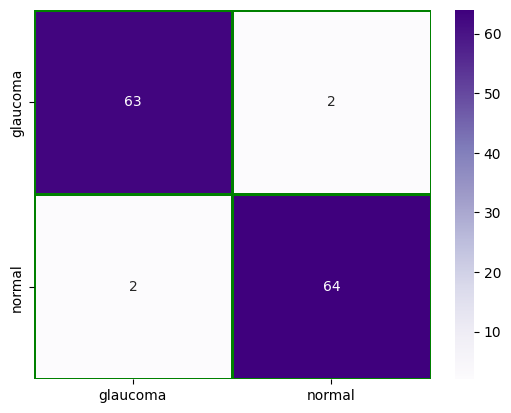

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
import pandas as pd

test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.969231,0.969231,0.969231,65.000000
normal,0.969697,0.969697,0.969697,66.000000
accuracy,0.969466,0.969466,0.969466,0.969466
macro avg,0.969464,0.969464,0.969464,131.000000
weighted avg,0.969466,0.969466,0.969466,131.000000


#SENSITIVITY & SPECIFICITY OF CNN MODEL

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already obtained the classification report
test_report = classification_report(test_ds.labels, test_pred_labels, target_names=['glaucoma', 'normal'], output_dict=True)

# Extract sensitivity (recall for the positive class) and specificity (recall for the negative class)
sensitivity = test_report['glaucoma']['recall']
specificity = test_report['normal']['recall']

print("Sensitivity (Recall for glaucoma):", sensitivity)
print("Specificity (Recall for normal):", specificity)


Sensitivity (Recall for glaucoma): 0.9692307692307692
Specificity (Recall for normal): 0.9696969696969697


#ROC CURVE

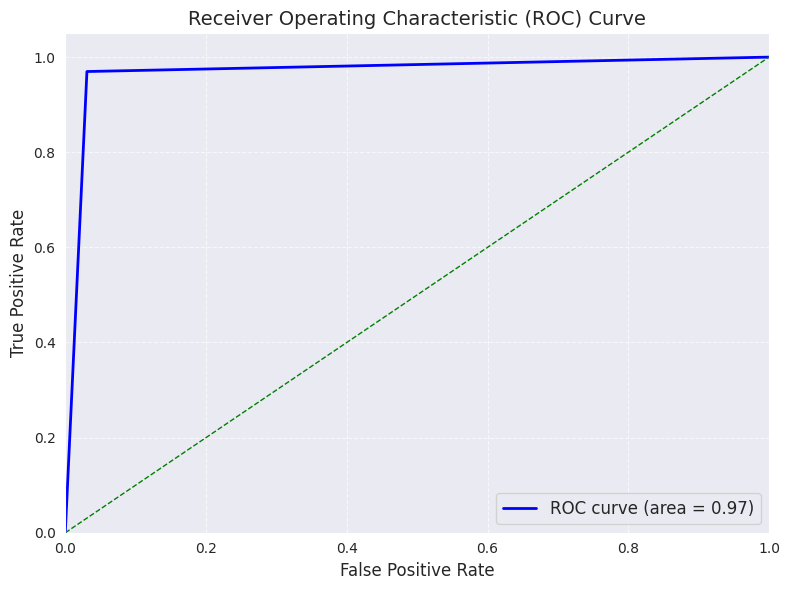

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the true labels in test_ds.labels and predicted labels in test_pred_labels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_ds.labels, test_pred_labels)

# Compute Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#ERROR ANALYSIS PLOT

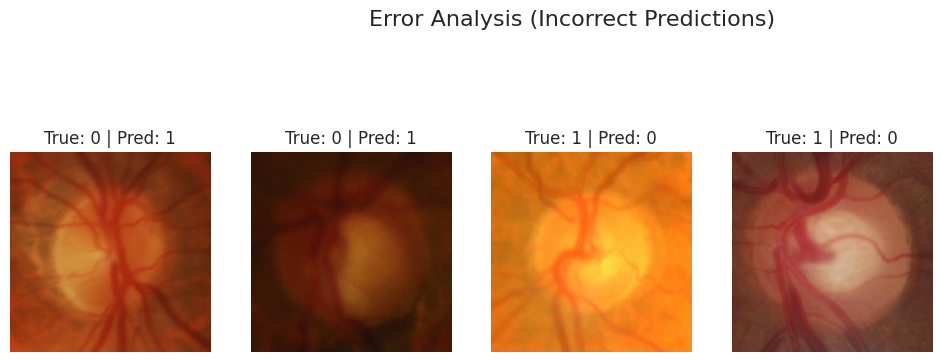

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Assuming you have the directory path where your test images are stored
test_directory = "/content/images/test"

# Convert the predictions to numpy array
test_pred_labels_np = np.array(test_pred_labels)

# Find the indices where the predictions are incorrect
incorrect_indices = np.where(test_ds.labels != test_pred_labels_np)[0]

# Load the incorrect images
incorrect_images = []
for idx in incorrect_indices:
    img_path = os.path.join(test_directory, test_ds.filenames[idx])
    img = image.load_img(img_path, target_size=(224, 224))  # Change target_size as per your image size
    img_array = image.img_to_array(img)
    incorrect_images.append(img_array)

# Convert to numpy array
incorrect_images = np.array(incorrect_images)

# Assuming you have a function to display images, e.g., display_image(image)
def display_images(images, titles, cols=5):
    rows = len(images) // cols + 1
    plt.figure(figsize=(15, 5 * rows))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image.astype(np.uint8))  # Ensure image data type is uint8
        plt.title(title)
        plt.axis('off')

# Display the images where predictions are incorrect along with their true and predicted labels
incorrect_true_labels = test_ds.labels[incorrect_indices]
incorrect_pred_labels = test_pred_labels_np[incorrect_indices]
titles = ['True: {} | Pred: {}'.format(true_label, pred_label) for true_label, pred_label in zip(incorrect_true_labels, incorrect_pred_labels)]
display_images(incorrect_images, titles)

plt.suptitle('Error Analysis (Incorrect Predictions)', fontsize=16)
plt.show()




#CALIBRATION PLOT

In [ ]:
# Assuming you have a trained model named model and test data named test_ds

# Generate predicted probabilities for the test set
test_pred_probs = model.predict(test_ds)

# Assuming it's a binary classification task, you may need to extract probabilities for the positive class
# For example, if you're using a softmax output layer, you can use [:, 1] to extract probabilities for the positive class
test_pred_probs = test_pred_probs[:, 1]


5/5 [==============================] - 17s 3s/step


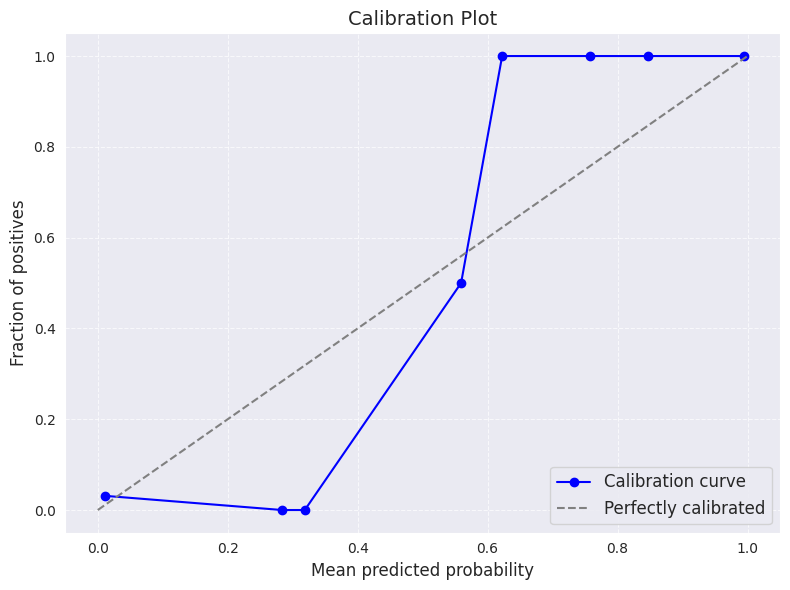

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assuming you have true labels in test_ds.labels and predicted probabilities in test_pred_probs

# Compute calibration curve
prob_true, prob_pred = calibration_curve(test_ds.labels, test_pred_probs, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='b', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability', fontsize=12)
plt.ylabel('Fraction of positives', fontsize=12)
plt.title('Calibration Plot', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
